In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
result = pd.read_csv('fig_noti.csv')

In [3]:
session_1_mean = result['session_1_count'].mean()
session_1_std = result['session_1_count'].std()

session_2_mean = result['session_2_count'].mean()
session_2_std = result['session_2_count'].std()

# Printing the results
print(f"Session 1 - Mean: {session_1_mean}, Standard Deviation: {session_1_std}")
print(f"Session 2 - Mean: {session_2_mean}, Standard Deviation: {session_2_std}")

Session 1 - Mean: 1205.2692307692307, Standard Deviation: 766.2518937107983
Session 2 - Mean: 1043.4615384615386, Standard Deviation: 567.8119569554153


## 알림 개수 변화

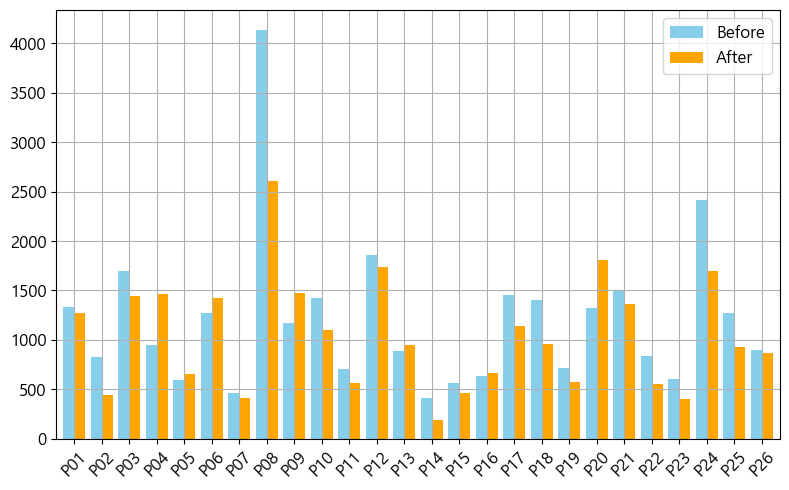

In [4]:
result['user_x'] = result['user_x'].apply(lambda x: f"P{int(x[1:]):02}")

fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(result))

ax.bar(index, result['session_1_count'], bar_width, label='Before', color='skyblue')
ax.bar(index + bar_width, result['session_2_count'], bar_width, label='After', color='orange')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(result['user_x'], fontsize=12, rotation=45)

ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12)
plt.grid()
plt.tight_layout()
ax.margins(x=0.01)

plt.show()

In [5]:
from scipy.stats import shapiro, ttest_rel

session_1_count = result["session_1_count"]
session_2_count = result["session_2_count"]

shapiro_session_1 = shapiro(session_1_count)
shapiro_session_2 = shapiro(session_2_count)

t_test_result = ttest_rel(session_2_count, session_1_count)

# Print results
print("Normality Test Results (Shapiro-Wilk):")
print(f"Session 1 p-value: {shapiro_session_1.pvalue}")
print(f"Session 2 p-value: {shapiro_session_2.pvalue}")
print("\nPaired t-test Results:")
print(f"T-statistic: {t_test_result.statistic}")
print(f"P-value: {t_test_result.pvalue}")

Normality Test Results (Shapiro-Wilk):
Session 1 p-value: 6.177943578222767e-05
Session 2 p-value: 0.15012317895889282

Paired t-test Results:
T-statistic: -2.1157051961674838
P-value: 0.044504836780091435


## 화면 킨 빈도 수 변화

In [6]:
df = pd.read_csv('fig_screen.csv')

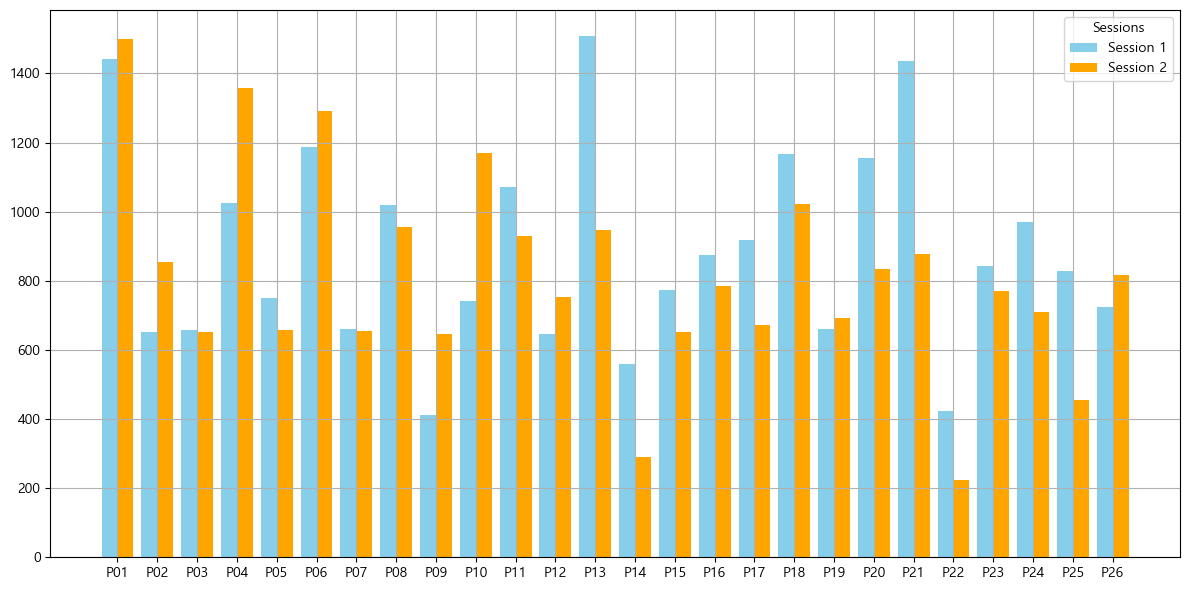

In [7]:
df['user'] = df['user'].apply(lambda x: f"P{int(x[1:]):02}" if x.startswith('u') else x)

session_1_data = df[df['session'] == 1][['user', 'row_count']].set_index('user')
session_2_data = df[df['session'] == 2][['user', 'row_count']].set_index('user')

bar_data = pd.concat(
    [session_1_data.rename(columns={'row_count': 'Session 1'}),
     session_2_data.rename(columns={'row_count': 'Session 2'})],
    axis=1
)

bar_data_sorted = bar_data.sort_index(key=lambda x: x.str.extract('(\d+)')[0].astype(int))

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(bar_data_sorted))

ax.bar(index, bar_data_sorted['Session 1'], bar_width, label='Session 1', color='skyblue')
ax.bar(index + bar_width, bar_data_sorted['Session 2'], bar_width, label='Session 2', color='orange')


ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(bar_data_sorted.index, fontsize=10)
ax.legend(title="Sessions", fontsize=10)

plt.grid()
plt.tight_layout()
plt.show()

## 상단바 내린 횟수 변화(알림 확인 빈도)

In [9]:
result = pd.read_csv('fig_seen.csv')

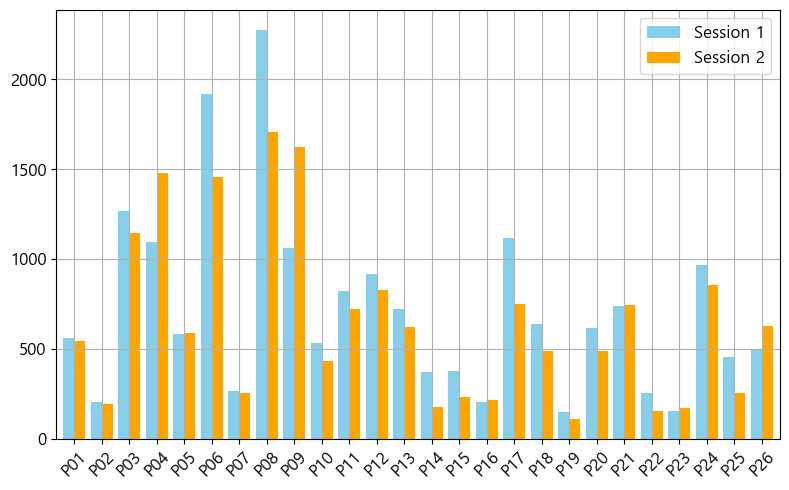

In [10]:
result['user'] = result['user'].apply(lambda x: f"P{int(x[1:]):02}")  # Convert u01~u26 to P01~P26

fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.4
index = np.arange(len(result))

ax.bar(index, result['session_1_count'], bar_width, label='Session 1', color='skyblue')
ax.bar(index + bar_width, result['session_2_count'], bar_width, label='Session 2', color='orange')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(result['user'], fontsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12)
plt.grid()
ax.margins(x=0.01)
plt.tight_layout()
plt.show()

## 알림 쌓여있는 개수 변화

In [12]:
average_event_count = pd.read_csv('fig_stack.csv')

<Figure size 800x600 with 0 Axes>

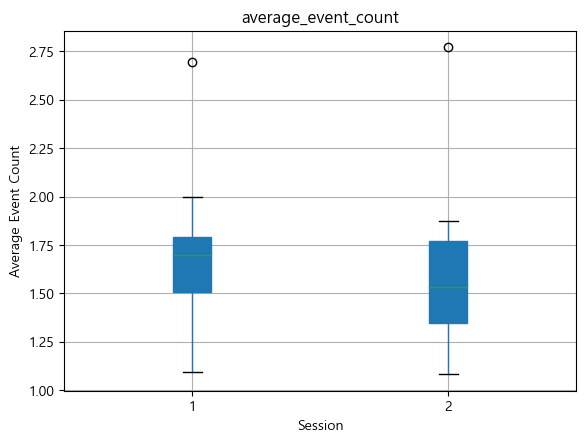

In [13]:
plt.figure(figsize=(8, 6))
average_event_count.boxplot(column='average_event_count', by='session', grid=False, patch_artist=True)

plt.suptitle('')
plt.xlabel('Session')
plt.ylabel('Average Event Count')
plt.grid()
plt.show()

## 알림이 몇개 쌓여있을 때 "요청시 받기" 버튼을 누르는지

In [14]:
df = pd.read_csv('fig_press.csv')

<Figure size 2000x1000 with 0 Axes>

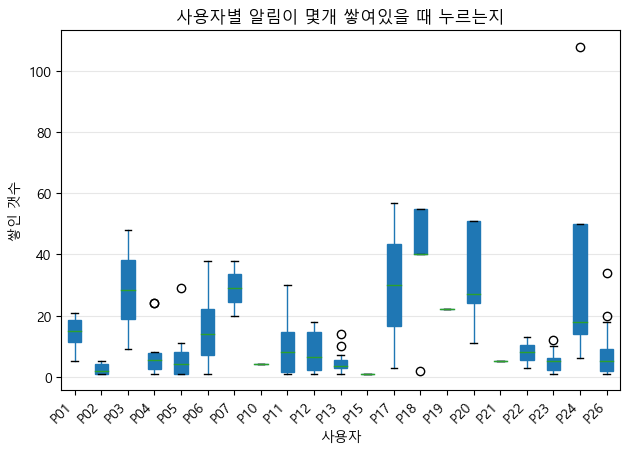

In [15]:
df['user'] = df['user'].apply(lambda x: f"P{int(x[1:]):02}" if x.startswith('u') else x)

plt.figure(figsize=(20, 10))
ax = df.boxplot(column='pendingNotificationCount', by='user', grid=False, patch_artist=True)

for box in ax.artists:
    box.set_facecolor('skyblue')  

plt.title('사용자별 알림이 몇개 쌓여있을 때 누르는지')
plt.suptitle('')  
plt.xlabel('사용자')
plt.ylabel('쌓인 갯수')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 유저별 알림 수신모드 설정 (앱)

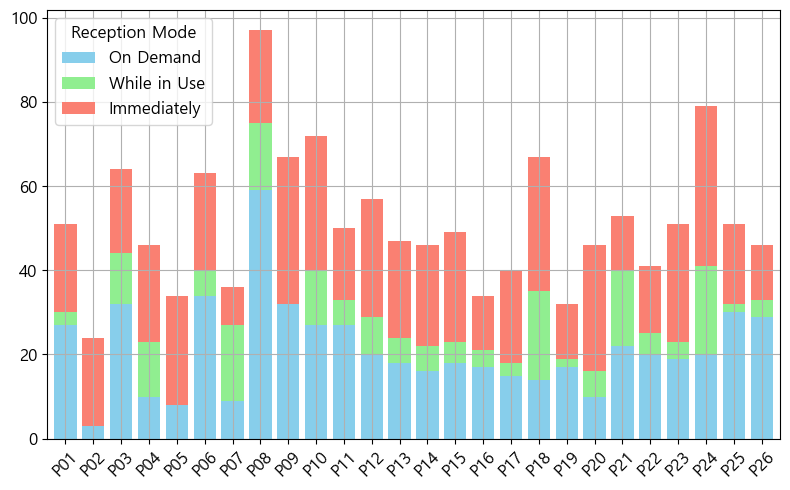

In [17]:
import matplotlib.pyplot as plt
import numpy as np

users = ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
         'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
         'P21', 'P22', 'P23', 'P24', 'P25', 'P26'
        ]
immediate = [
    21, 21, 20, 23, 26, 23, 9, 22, 35, 32,
    17, 28, 23, 24, 26, 13, 22, 32, 13, 30,
    13, 16, 28, 38, 19, 13
]
enabled = [
    3, 0, 12, 13, 0, 6, 18, 16, 0, 13,
    6, 9, 6, 6, 5, 4, 3, 21, 2, 6,
    18, 5, 4, 21, 2, 4
]
requested = [
    27, 3, 32, 10, 8, 34, 9, 59, 32, 27,
    27, 20, 18, 16, 18, 17, 15, 14, 17, 10,
    22, 20, 19, 20, 30, 29
]

fig, ax = plt.subplots(figsize=(8, 5))

plt.bar(users, requested, label="On Demand", color="skyblue")
plt.bar(users, enabled, bottom=requested, label="While in Use", color="lightgreen")
plt.bar(users, immediate, bottom=np.add(requested, enabled), label="Immediately", color="salmon")

plt.legend(title="Reception Mode", title_fontsize=12, fontsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.grid()
plt.tight_layout()
ax.margins(x=0.01)

plt.show()

## 유저별 알림 수신모드 설정 (키워드)

In [18]:
keyword = pd.read_csv('fig_keyword.csv')

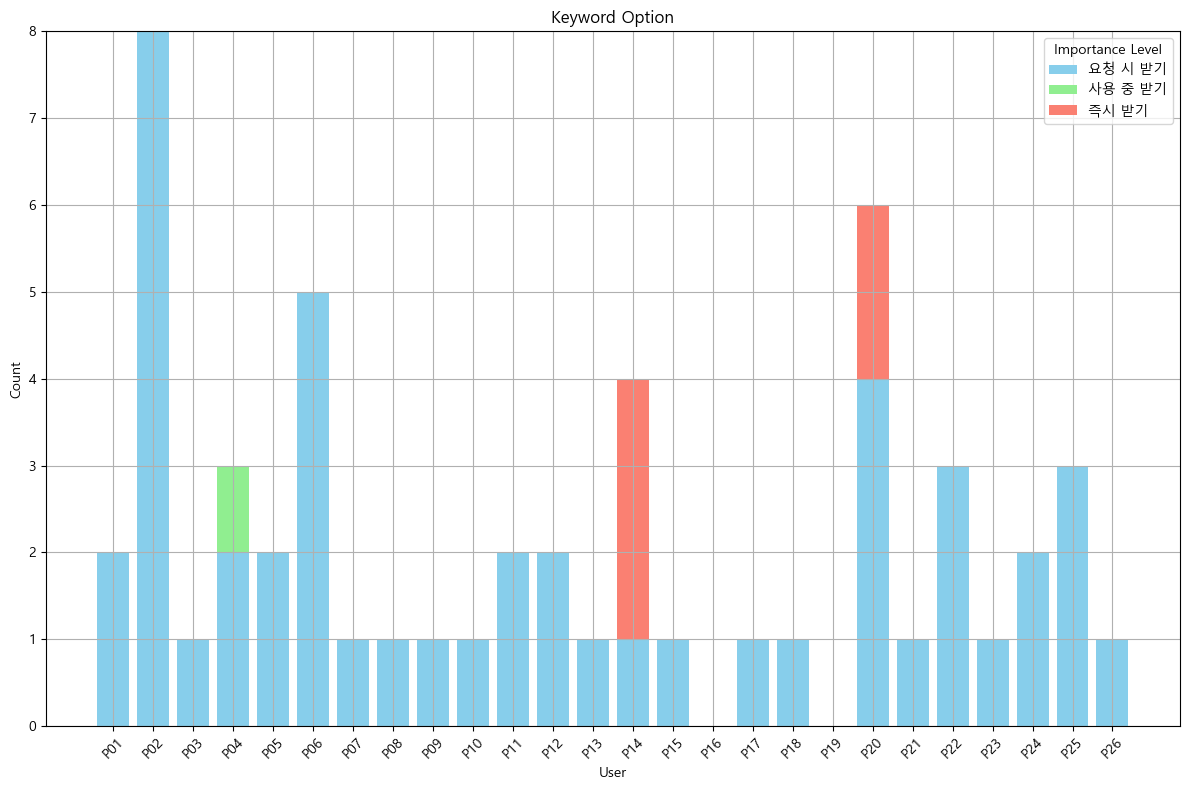

In [19]:
users = [f"P{i:02}" for i in range(1, 27)] 

keyword['importanceLevel'] = keyword['importanceLevel'].map({
    'high': '즉시 받기',
    'medium': '사용 중 받기',
    'low': '요청 시 받기'
})

grouped = keyword.groupby(['user', 'importanceLevel']).size().unstack(fill_value=0)
grouped.index = [f"P{int(i[1:]):02}" for i in grouped.index]
grouped = grouped.reindex(users, fill_value=0)

requested = grouped['요청 시 받기']
enabled = grouped['사용 중 받기']
immediate = grouped['즉시 받기']

plt.figure(figsize=(12, 8))
plt.bar(users, requested, label="요청 시 받기", color="skyblue")
plt.bar(users, enabled, bottom=requested, label="사용 중 받기", color="lightgreen")
plt.bar(users, immediate, bottom=np.add(requested, enabled), label="즉시 받기", color="salmon")

plt.title("Keyword Option")
plt.xlabel("User")
plt.ylabel("Count")
plt.legend(title="Importance Level")
plt.xticks(rotation=45)
plt.tight_layout()

plt.grid()
plt.show()

## 수신 모드별 알림 처리 방법

In [20]:
grouped_df = pd.read_csv('fig_delete.csv')

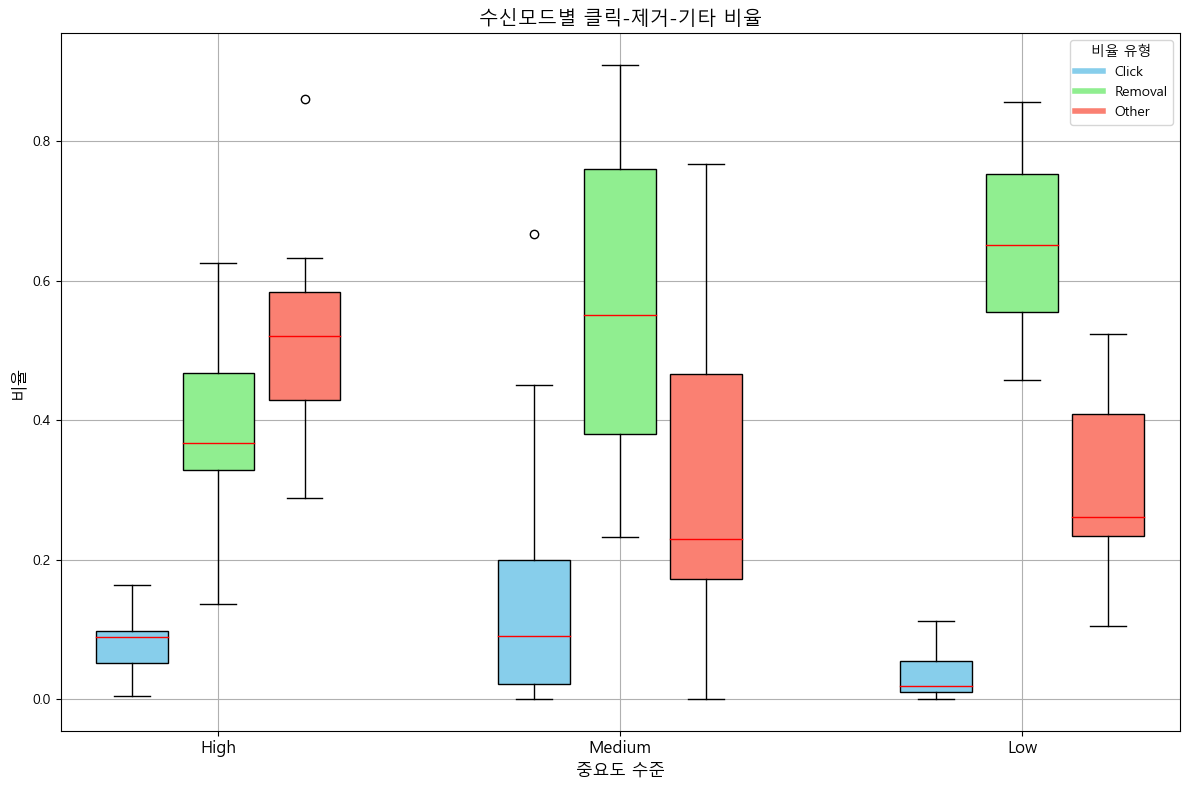

In [22]:
importance_order = ['high', 'medium', 'low']
ratio_types = {'Click': '클릭_ratio', 'Removal': '제거_ratio', 'Other': '기타_ratio'}  # 열 이름 반영

data = []
labels = []
colors = {'Click': 'skyblue', 'Removal': 'lightgreen', 'Other': 'salmon'}  # 비율 유형에 따른 색상 정의

for importance in importance_order:
    for ratio_type, column_name in ratio_types.items():  # 열 이름 매핑
        # 중요도에 따라 데이터 필터링
        level_data = grouped_df[grouped_df['importance'] == importance]
        if column_name in level_data:  # 열이 존재하는지 확인
            data.append(level_data[column_name].dropna())
            labels.append(f'{importance.capitalize()} - {ratio_type}')  # 레이블 추가
        else:
            print(f"Column '{column_name}' not found in grouped_df")

positions = []
group_spacing = 1  # 그룹 간 간격
within_group_spacing = 0.6  # 그룹 내 간격

for i, importance in enumerate(importance_order):
    start_pos = i * group_spacing + (i * len(ratio_types) * within_group_spacing)
    for j in range(len(ratio_types)):
        positions.append(start_pos + j * within_group_spacing)

plt.figure(figsize=(12, 8))
box = plt.boxplot(data, patch_artist=True, positions=positions,
                  boxprops=dict(facecolor='lightgrey', color='black'),
                  medianprops=dict(color='red'))

for patch, label in zip(box['boxes'], labels):
    ratio_type = label.split(' - ')[1]  # 비율 유형 추출
    patch.set_facecolor(colors[ratio_type])  # 해당 유형에 따른 색상 지정

group_centers = [np.mean(positions[i:i + len(ratio_types)]) for i in range(0, len(positions), len(ratio_types))]
group_labels = [f'{importance.capitalize()}' for importance in importance_order]
plt.xticks(group_centers, group_labels, fontsize=12)  # x축 레이블 설정

plt.title("수신모드별 클릭-제거-기타 비율", fontsize=14)
plt.xlabel("중요도 수준", fontsize=12)
plt.ylabel("비율", fontsize=12)
plt.tight_layout()

handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
plt.legend(handles, ratio_types.keys(), title="비율 유형", loc="upper right")
plt.grid()

plt.show()

## 멘탈 지수 변화

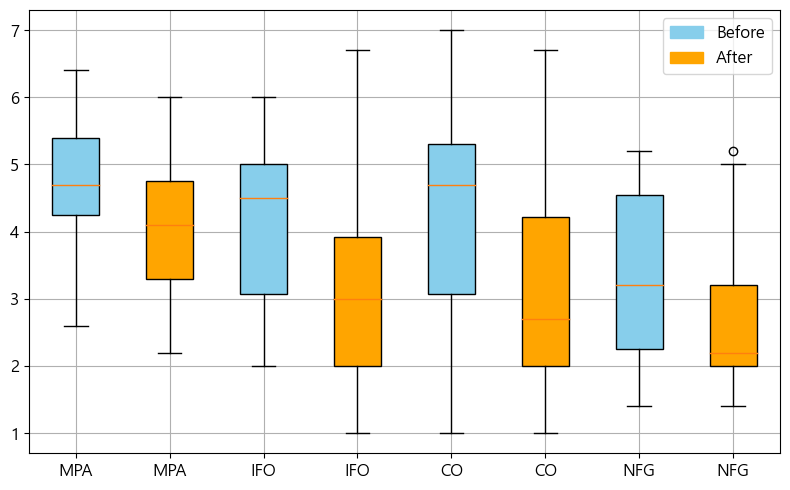

In [24]:
import matplotlib.patches as mpatches

mobile_addiction_1 = [5.6, 4.8, 4.8, 4.6, 5.6, 4.8, 4.6, 4.4, 3.8, 3.2, 
                      5.4, 4.6, 4.8, 4.4, 5.0, 4.2, 3.4, 6.0, 4.2, 6.4, 
                      2.6, 4.6, 5.4, 5.4, 5.6, 4.0]
mobile_addiction_2 = [4.4, 3.6, 4.8, 4.2, 4.2, 4.0, 2.8, 3.8, 2.6, 2.6, 
                      5.0, 5.8, 4.0, 4.2, 5.0, 2.6, 3.2, 6.0, 3.6, 5.4, 
                      2.2, 2.2, 4.6, 4.0, 5.0, 4.4]

IFO_1 = [3.0, 5.0 ,2.3 ,4.7 ,4.7 ,5.7 ,5.0 ,5.3 ,3.3 ,6.0 ,3.3 ,2.0 ,
4.0 ,4.0 ,2.7 ,5.7 ,2.3 ,4.0 ,6.0 ,3.0 ,2.0 ,4.7 ,4.3 ,5.7 ,5.0 ,4.7]

IFO_2 = [5.3 ,1.0 ,3.7 ,1.7 ,2.3 ,4.0 ,4.0 ,2.0 ,1.3 ,2.0 ,1.0 ,2.0 ,4.0 ,3.3 ,3.7 ,
2.7 ,6.7 ,3.0 ,3.0 ,2.3 ,5.0 ,2.3 ,5.7 ,2.0 ,3.3 ,3.0]

CO_1 = [2.7 ,4.7 ,2.3 ,3.3 ,5.3 ,5.3 ,5.3 ,5.0 ,3.7 ,4.7 ,2.0 ,1.0 ,2.3 ,5.3 ,3.7 ,6.0 ,
3.7 ,4.7 ,6.0 ,3.0 ,2.0 ,5.7 ,4.0 ,7.0 ,5.3 ,6.7 ]

CO_2 = [5.0 ,1.3 ,3.0 ,1.0 ,2.0 ,3.7 ,4.3 ,2.0 ,1.0 ,3.0 ,1.0 ,2.0 ,4.0 ,2.7 ,4.3 ,
2.3 ,6.7 ,4.7 ,2.0 ,1.3 ,4.3 ,2.0 ,4.7 ,1.7 ,3.0 ,2.7]

SFG_1 = [2.6, 5,1.8,2.6,4.8,4.2,5,4,1.6,3.8,4.4,3,2.2,1.4,
2,5.2,2.2,2.4,4.6,3.2,3.2,2.6,2.2,4.6,3.6,5.2]

SFG_2 = [4.2,1.4,2,2,1.8,3.2,3,2,1.4,2.4,
1.6,2,5,2.2,1.8,2.2,4.6,3.2,2,2.4,5.2,1.6,3.8,2.2,4,2.6]

data_to_plot = [
    mobile_addiction_1, mobile_addiction_2,
    IFO_1, IFO_2,
    CO_1, CO_2,
    SFG_1, SFG_2
]

colors = ['skyblue', 'orange', 'skyblue', 'orange', 
          'skyblue', 'orange', 'skyblue', 'orange']

plt.figure(figsize=(8, 5))
box = plt.boxplot(data_to_plot, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color)

plt.xticks(
    [1, 2, 3, 4, 5, 6,7, 8],
    ["MPA","MPA", "IFO", "IFO", "CO", "CO", "NFG", "NFG"],
    fontsize=12
)

plt.tick_params(axis='y', labelsize=12)

legend_patches = [
    mpatches.Patch(color='skyblue', label="Before"),
    mpatches.Patch(color='orange', label="After")
]

plt.legend(handles=legend_patches, loc="upper right", fontsize=12)


plt.tight_layout()
plt.grid()
plt.show()

## 카테고리별 알림 수신모드 설정

In [26]:
df = pd.read_csv('fig_category.csv')

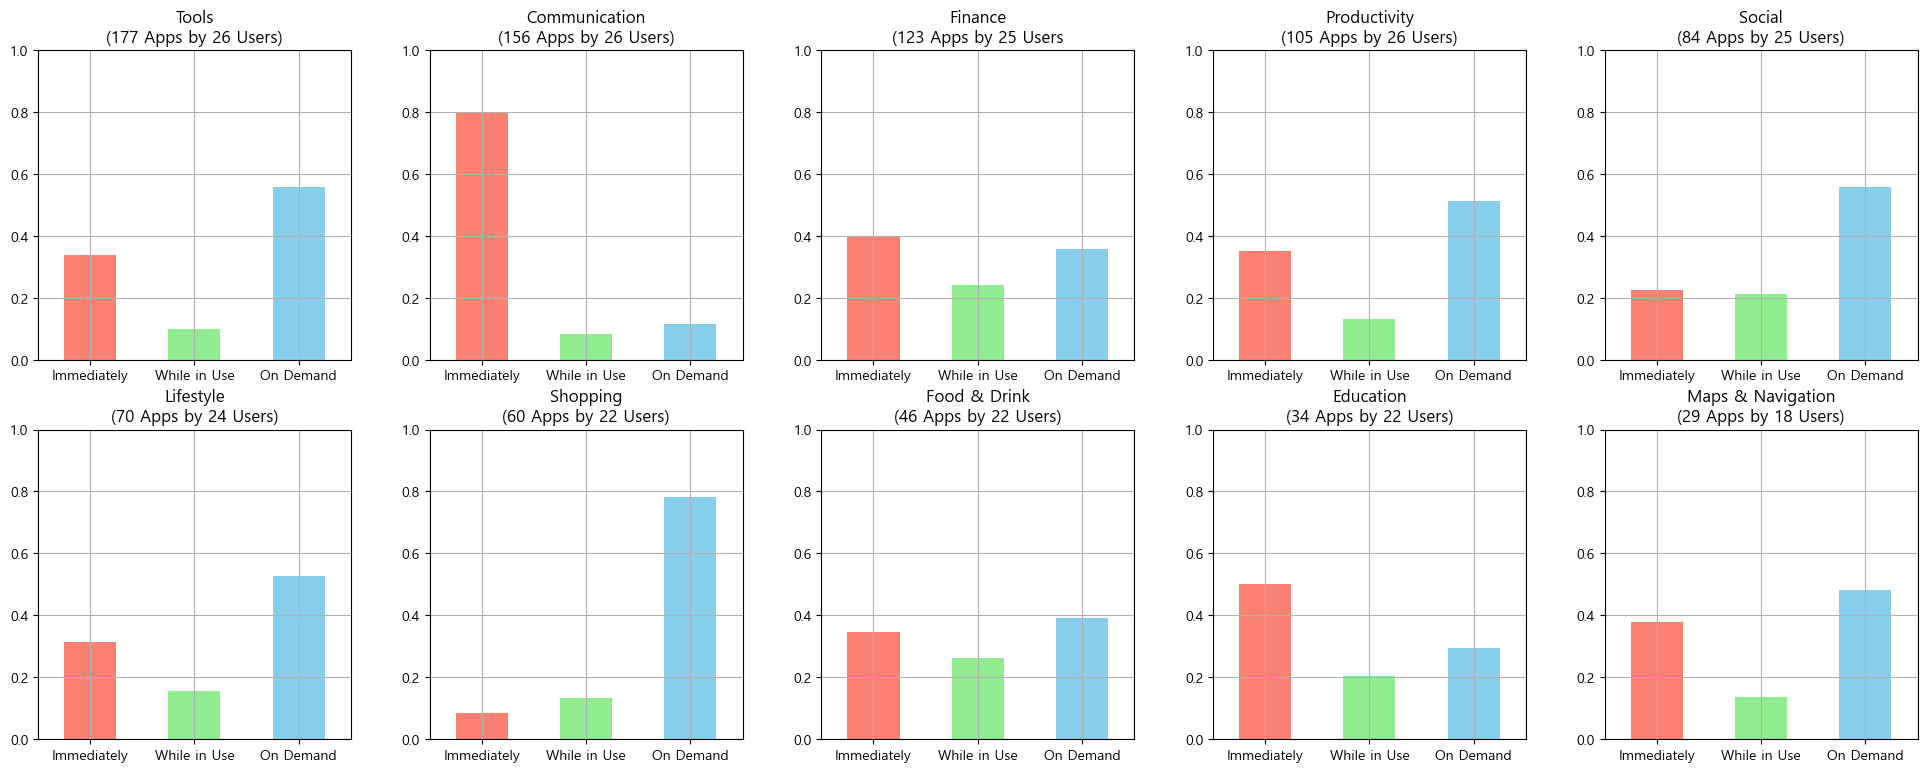

In [27]:
importance_levels = ["Immediately", "While in Use", "On Demand"]

category_name_mapping = {
    '도구': 'Tools\n(177 Apps by 26 Users)',
    '커뮤니케이션': 'Communication\n(156 Apps by 26 Users)',
    '금융': 'Finance\n(123 Apps by 25 Users',
    '생산성': 'Productivity\n(105 Apps by 26 Users)',
    '소셜': 'Social\n(84 Apps by 25 Users)',
    '라이프스타일': 'Lifestyle\n(70 Apps by 24 Users)',
    '쇼핑': 'Shopping\n(60 Apps by 22 Users)',
    '식음료': 'Food & Drink\n(46 Apps by 22 Users)',
    '교육': 'Education\n(34 Apps by 22 Users)',
    '지도/네비게이션': 'Maps & Navigation\n(29 Apps by 18 Users)'
}

desired_categories = list(category_name_mapping.keys())
filtered_df = df[df['카테고리'].isin(desired_categories)]

category_importance_distribution = (
    filtered_df.groupby(['카테고리', 'importanceLevel'])
    .size()
    .unstack(fill_value=0)
)

category_importance_distribution.rename(columns={
    "high": "Immediately",
    "medium": "While in Use",
    "low": "On Demand"
}, inplace=True)

category_importance_distribution = category_importance_distribution.loc[desired_categories]
category_importance_distribution.rename(index=category_name_mapping, inplace=True)
category_importance_distribution = category_importance_distribution.div(category_importance_distribution.sum(axis=1), axis=0)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.tight_layout(pad=3)

colors = ["salmon", "lightgreen", "skyblue"]

for i, (category, data) in enumerate(category_importance_distribution.iterrows()):
    ax = axes.flat[i]
    data.reindex(importance_levels).plot(
        kind="bar",
        ax=ax,
        color=colors,
        legend=False, 
    )
    
    ax.set_title(category, fontsize=12)
    ax.set_xlabel("")  
    ax.set_xticklabels(importance_levels, rotation=0)
    ax.set_ylim(0, 1)  
    ax.grid()

plt.show()